# Fourier Analysis of Time Series
In this notebook, we perform a complete Fourier analysis of a time series. The main objective is to decompose the signal into its constituent frequency components using the Fourier Transform, identify and filter out unwanted frequencies (such as noise), and then reconstruct the cleaned signal through the Inverse Fourier Transform.

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

%matplotlib inline

The function $f(t)$ represents a time series composed of several sinusoidal components with different frequencies and a random noise term $n$. Such a signal can model various time-dependent phenomena, such as fluctuations in the stock market, electrical or acoustic signals, or even periodic patterns in physical or biological systems. Analyzing it allows us to study both its periodic behavior and the influence of randomness over time.
$$f(t) = 2 \, \sin(4t) + \sin(t) + \cos\left(\frac{t}{4}\right) + n$$

In [152]:
N = 100       # N samples
DT = 10 / N   # Time step

t = np.array(range(1, N + 1)) * DT
f = 2 * np.sin(4 * t) + np.sin(t) + np.cos(t / 4) + t + np.random.uniform(0, 2, size=t.shape)

## Fourier Transform and Inverse Fourier Transform
The Fourier Transform represents the frequency-domain decomposition of the time-domain signal $f(t)$. It expresses the original signal as a combination of complex exponentials, each corresponding to a specific frequency component. This transformation is fundamental in fields such as signal processing, physics, and finance, as it reveals how different frequencies contribute to the overall behavior of the system.

The Fourier Transform of a signal $f(t)$ is defined as:
$$
F(\omega) = \int_{-\infty}^{\infty} f(t) \, e^{-i \omega t} \, dt
$$

The inverse Fourier Transform allows us to recover the original time-domain signal from its frequency-domain representation:
$$
f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega) \, e^{i \omega t} \, d\omega
$$

In other words, the original signal can be reconstructed by integrating over all frequency components, each weighted by its corresponding Fourier coefficient. This duality between the time and frequency domains is a key concept in analyzing and processing signals.



In [153]:
fourier_transform = fft(f)
magnitude = np.abs(fourier_transform)
frequencies = fftfreq(f.shape[0], DT)

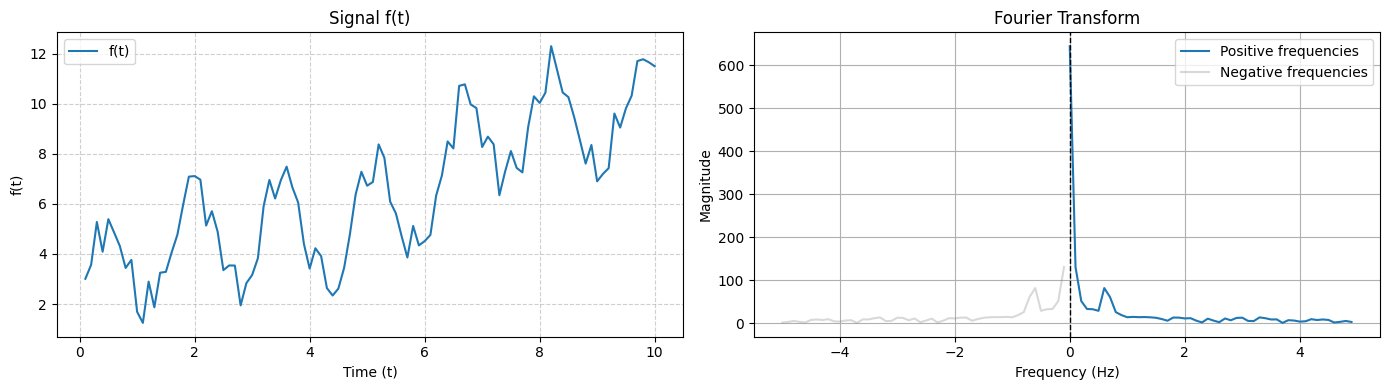

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].plot(t, f, label='f(t)')
axes[0].set_title('Signal f(t)')
axes[0].set_xlabel('Time (t)')
axes[0].set_ylabel('f(t)')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

axes[1].plot(frequencies[frequencies >= 0], magnitude[frequencies >= 0], label='Positive frequencies')
axes[1].plot(frequencies[frequencies < 0], magnitude[frequencies < 0], color='gray', alpha=0.3, label='Negative frequencies')
axes[1].axvline(0, color='black', linestyle='--', linewidth=1)
axes[1].set_title("Fourier Transform")
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_ylabel("Magnitude")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

We can see that there are some interesting peaks in the magnitude $|F(\omega)|$. We can split it into intervals of frequencies $\Omega_1 = [0, 0.5)$, $\Omega_2 = [0.5, 0.85)$ and $\Omega_3 = (0.85, ∞)$ according to its shape in order to isolate the different frequencies that are more relevant to the time series $f(t)$

In [155]:
Omega_1 = (0.00, 0.20)
Omega_2 = (0.25, 0.40)
Omega_3 = (0.55, 0.65)
Omega_4 = (0.80, max(frequencies))

intervals = [Omega_1, Omega_2, Omega_3, Omega_4]

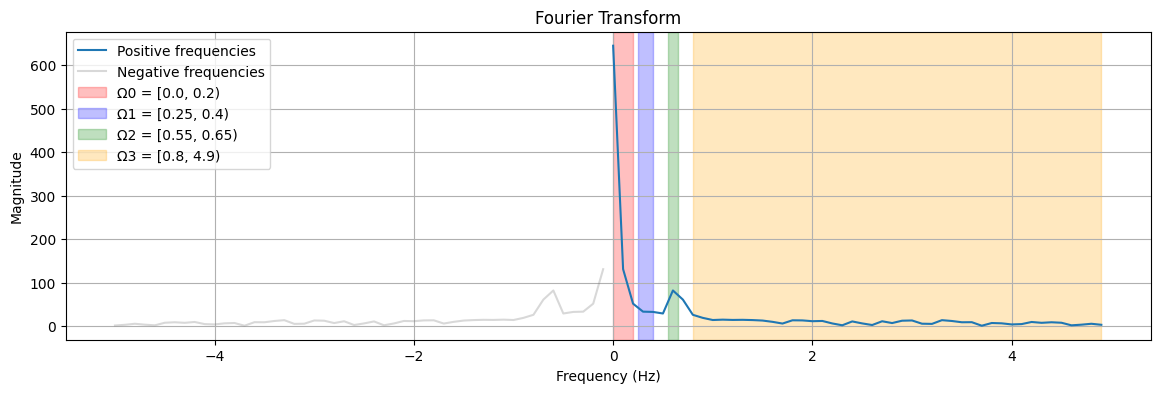

In [156]:
plt.figure(figsize=(14,4))
plt.plot(frequencies[frequencies >= 0], magnitude[frequencies >= 0], label='Positive frequencies')
plt.plot(frequencies[frequencies < 0], magnitude[frequencies < 0], color='gray', alpha=0.3, label='Negative frequencies')

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta']
for i, interval in enumerate(intervals):
  color = colors[i % len(colors)]
  plt.axvspan(interval[0], interval[1], alpha=0.25, color=color, label=f'Ω{i} = [{interval[0]}, {interval[1]})')

plt.title("Fourier Transform")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.show()

## Filtering using intervals of frequencies

If we have an interval of frequencies $\Omega = (\omega_1, \omega_2)$ that is relevant, for instance, the frequencies that represent a sesonality, or the ones that represent the noise. We can filter $F(\omega)$ by defining a new function $\hat{F}(\omega)$ that:

$$
\hat{F}(\omega)
\begin{cases}
F(\omega) & \text{if}\; \omega \in \Omega \\
0 & \text{if}\; \omega \notin \Omega
\end{cases}
$$

We can return to the time domain by using the Inverse Fourier Transform. As we can see, the Inverse Fourier Transform of $\hat{F}(\omega)$ is nothing more than the Inverse Fourier Transform of $F(\omega)$ in our interval of interest $\Omega$:

$$\psi(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \hat{F}(\omega) \, e^{i \omega t} \, d\omega = \frac{1}{2\pi} \left( \int_{\mathbb{R} ∖ \Omega} \hat{F}(\omega) \, e^{i \omega t} \, d\omega + \int_{\Omega} \hat{F}(\omega) \, e^{i \omega t} \, d\omega\right) = \frac{1}{2\pi} \left( 0 + \int_{\Omega} F(\omega) \, e^{i \omega t} \, d\omega \right)$$

$$\psi(t) = \frac{1}{2\pi} \int_{\Omega} F(\omega) \, e^{i \omega t} \, d\omega$$

In the case of having multiple intervals of interest:

$$\psi(t) = \psi_1(t) + \psi_2(t) + \cdots + \psi_n(t) = \sum_i \psi_i(t)$$

$$\sum_i \psi_i(t) = \frac{1}{2\pi} \left( \int_{\Omega_1} F(\omega) \, e^{i \omega t} \, d\omega + \int_{\Omega_2} F(\omega) \, e^{i \omega t} \, d\omega + \cdots + \int_{\Omega_n} F(\omega) \, e^{i \omega t} \, d\omega \right) = $$

$$\psi(t) = \sum_i \psi_i(t) =  \frac{1}{2\pi} \int_{\bigcup_i \Omega_i} F(\omega) \, e^{i \omega t} \, d\omega$$


In [166]:
F_hat: list[np.array] = []
psi: list[np.array] = []

for low, high in intervals:

    F_hat_i = fourier_transform.copy()

    mask_i = (np.abs(frequencies) >= low) & (np.abs(frequencies) < high)
    F_hat_i[~mask_i] = 0

    psi_i = ifft(F_hat_i).real

    F_hat.append(F_hat_i)
    psi.append(psi_i)

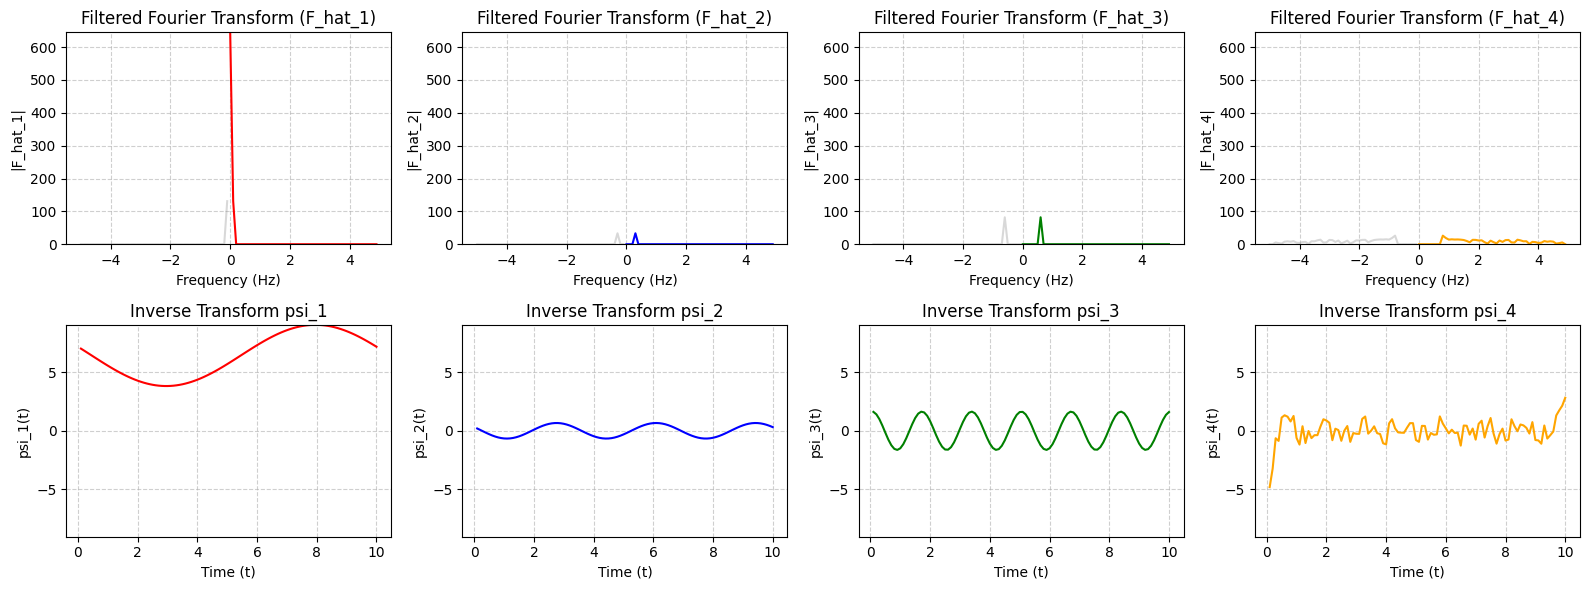

In [167]:
n = len(intervals)
max_F = max(np.max(np.abs(F_hat_i)) for F_hat_i in F_hat)
max_psi = max(np.max(np.abs(psi_i)) for psi_i in psi)

fig, axes = plt.subplots(2, n, figsize=(4 * n, 6))

for i in range(n):

    color = colors[i % len(colors)]

    # Fourier Transform
    ax = axes[0, i]
    ax.set_title(f"Filtered Fourier Transform (F_hat_{i+1})")

    ax.plot(frequencies[frequencies >= 0],
            np.abs(F_hat[i])[frequencies >= 0], color=color)

    ax.plot(frequencies[frequencies < 0],
            np.abs(F_hat[i])[frequencies < 0],
            color='gray', alpha=0.3)

    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel(f"|F_hat_{i+1}|")
    ax.set_ylim(0, max_F)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Inverse Transform
    ax = axes[1, i]
    ax.plot(t, psi[i], color=color)
    ax.set_title(f"Inverse Transform psi_{i+1}")

    ax.set_xlabel("Time (t)")
    ax.set_ylabel(f"psi_{i+1}(t)")
    ax.set_ylim(-max_psi, max_psi)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Now, it is possible to detect the deterministic functions and the noise:

* Deterministic: $\psi_1(t), \psi_2(t), \psi_3(t)$
* Stochastic: $\psi_4(t)$

We can remove the stochastic part from the original time series so we get the complete deterministic part (smooth): $\hat{f}(t) = f(t) - \psi_4(t)$

In [170]:
f_hat = f - psi[3]

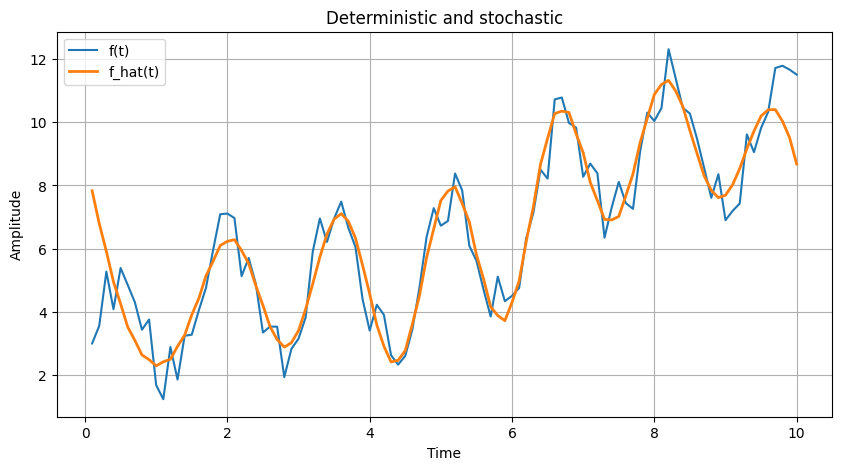

In [173]:
plt.figure(figsize=(10,5))
plt.plot(t, f, label='f(t)')
plt.plot(t, f_hat, label='f_hat(t)', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Deterministic and stochastic')
plt.legend()
plt.grid(True)
plt.show()